In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import scipy
import scipy.ndimage
import pandas as pd
import math
import copy

import torch
from torch.nn import functional as F

from PIL import Image
import astropy
import aplpy
# from regions import DS9Parser

In [2]:
detections_150 = np.load('result/result_ring_select_csize150.npy')
position_150 = np.load('result/position_ring_select_csize150.npy')
print(position_150.shape, detections_150.shape)

(40289, 2) (40289, 2, 200, 5)


In [3]:
detections_300 = np.load('result/result_ring_select_csize300.npy')
position_300 = np.load('result/position_ring_select_csize300.npy')
print(position_300.shape, detections_300.shape)

(9603, 2) (9603, 2, 200, 5)


In [4]:
detections_600 = np.load('result/result_ring_select_csize600.npy')
position_600 = np.load('result/position_ring_select_csize600.npy')
print(position_600.shape, detections_600.shape)

(2049, 2) (2049, 2, 200, 5)


In [5]:
detections_900 = np.load('result/result_ring_select_csize900.npy')
position_900 = np.load('result/position_ring_select_csize900.npy')
print(position_900.shape, detections_900.shape)

(769, 2) (769, 2, 200, 5)


In [6]:
detections_1200 = np.load('result/result_ring_select_csize1200.npy')
position_1200 = np.load('result/position_ring_select_csize1200.npy')
print(position_1200.shape, detections_1200.shape)

(363, 2) (363, 2, 200, 5)


In [7]:
detections_1800 = np.load('result/result_ring_select_csize1800.npy')
position_1800 = np.load('result/position_ring_select_csize1800.npy')
print(position_1800.shape, detections_1800.shape)

(104, 2) (104, 2, 200, 5)


In [8]:
detections_2000 = np.load('result/result_ring_select_csize2000.npy')
position_2000 = np.load('result/position_ring_select_csize2000.npy')
print(position_2000.shape, detections_2000.shape)

(71, 2) (71, 2, 200, 5)


In [9]:
detections_2500 = np.load('result/result_ring_select_csize2500.npy')
position_2500 = np.load('result/position_ring_select_csize2500.npy')
print(position_2500.shape, detections_2500.shape)

(34, 2) (34, 2, 200, 5)


In [10]:
detections_3000 = np.load('result/result_ring_select_csize3000.npy')
position_3000 = np.load('result/position_ring_select_csize3000.npy')
print(position_3000.shape, detections_3000.shape)

(12, 2) (12, 2, 200, 5)


In [11]:
detection_list = [detections_150, detections_300, detections_600, detections_900, detections_1200, 
                  detections_1800, detections_2000, detections_2500, detections_3000]#, detections_5000]
position_list = [position_150, position_300, position_600, position_900, position_1200, 
                  position_1800, position_2000, position_2500, position_3000]#, position_5000]

In [12]:
size_list = [150, 300, 600, 900, 1200, 1800, 2000, 2500, 3000]

In [13]:
max_list = []
min_list = []
for pos,si in zip(detection_list, size_list):
    max_list.append(pos[:,1,:,0].max())
    min_list.append(pos[:,1,:,0].min())
    
max(max_list),min(min_list)

(0.99996436, 0.0)

In [15]:
bins=np.linspace(min(min_list), max(max_list), 50)

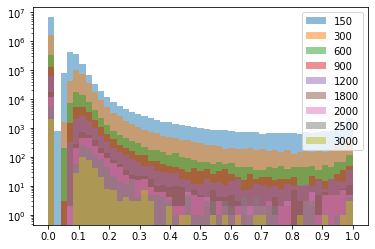

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

for pos,si in zip(detection_list, size_list):
    ax.hist(np.ravel(pos[:,1,:,0]), label=('%s'%si), alpha=0.5, bins=bins)
    
ax.set_yscale('log') 
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.legend()